In [4]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [6]:
path="../data/YK_TX2017-19_Accidents.csv"
traffic_df=pd.read_csv(path)
traffic_df.head()


,Unnamed: 0,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year
0,0,A-267712,MapQuest,201.0,2,2017-01-02 14:40:12,2017-01-02 15:39:53,30.393579,-97.745979,NaN,...,False,False,False,False,False,Day,Day,Day,Day,2017
1,1,A-267713,MapQuest,201.0,2,2017-01-02 14:28:48,2017-01-02 15:28:36,30.256216,-97.722038,NaN,...,False,False,False,False,False,Day,Day,Day,Day,2017
2,2,A-267714,MapQuest,201.0,2,2017-01-02 14:04:17,2017-01-02 15:05:00,30.418287,-97.700874,NaN,...,False,False,False,False,False,Day,Day,Day,Day,2017
3,3,A-267715,MapQuest,201.0,2,2017-01-02 14:29:13,2017-01-02 15:35:00,30.237938,-97.696167,NaN,...,False,False,False,False,False,Day,Day,Day,Day,2017
4,4,A-267716,MapQuest,201.0,2,2017-01-02 14:40:51,2017-01-02 15:40:23,30.364882,-97.695992,NaN,...,False,False,False,True,False,Day,Day,Day,Day,2017


In [7]:
traffic_df.columns

Index(['Unnamed: 0', 'ID', 'Source', 'TMC', 'Severity', 'Start_Time',
       'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Description', 'Number', 'Street', 'Side', 'City',
       'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Year'],
      dtype='object')

In [53]:
counties=sorted(traffic_df['County'].unique())
counties



['Anderson',
 'Andrews',
 'Angelina',
 'Archer',
 'Armstrong',
 'Atascosa',
 'Austin',
 'Bailey',
 'Bandera',
 'Bastrop',
 'Baylor',
 'Bee',
 'Bell',
 'Bexar',
 'Blanco',
 'Bosque',
 'Bowie',
 'Brazoria',
 'Brazos',
 'Brewster',
 'Brooks',
 'Burleson',
 'Burnet',
 'Caldwell',
 'Calhoun',
 'Callahan',
 'Cameron',
 'Cass',
 'Chambers',
 'Cherokee',
 'Childress',
 'Clay',
 'Coleman',
 'Collin',
 'Colorado',
 'Comal',
 'Comanche',
 'Concho',
 'Cooke',
 'Coryell',
 'Cottle',
 'Crane',
 'Crockett',
 'Crosby',
 'Culberson',
 'Dallam',
 'Dallas',
 'Dawson',
 'DeWitt',
 'Deaf Smith',
 'Delta',
 'Denton',
 'Dimmit',
 'Donley',
 'Eastland',
 'Ector',
 'Edwards',
 'El Paso',
 'Ellis',
 'Erath',
 'Falls',
 'Fannin',
 'Fayette',
 'Fisher',
 'Fort Bend',
 'Franklin',
 'Freestone',
 'Frio',
 'Gaines',
 'Galveston',
 'Garza',
 'Gillespie',
 'Glasscock',
 'Goliad',
 'Gonzales',
 'Gray',
 'Grayson',
 'Gregg',
 'Grimes',
 'Guadalupe',
 'Hale',
 'Hall',
 'Hardin',
 'Harris',
 'Harrison',
 'Hartley',
 'Hask

In [54]:
traffic_df['Severity'].unique()

array([2, 3, 4, 1], dtype=int64)

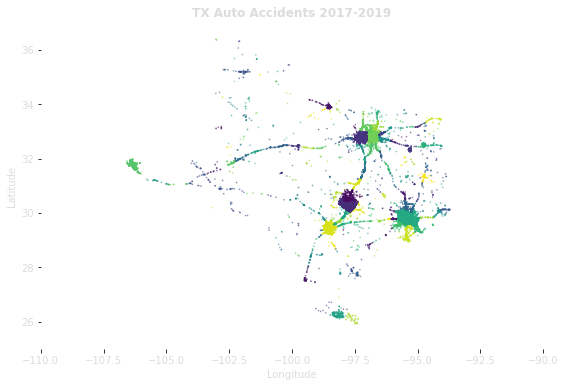

In [63]:
from matplotlib.cm import viridis

max_gini=len(counties)
colors=[]
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 9
fig_size[1] = 6
plot1= plt.subplot(111)
plot1.spines["top"].set_visible(False)    
plot1.spines["bottom"].set_visible(False)    
plot1.spines["right"].set_visible(False)    
plot1.spines["left"].set_visible(False)
plot1=plt.ylim(25, 37)
plot1=plt.xlim(-110, -90)
color_t='gainsboro'
plt.ylabel('Latitude', color=color_t)
plt.xlabel('Longitude', color=color_t)
plt.title('TX Auto Accidents 2017-2019', color=color_t,fontweight="bold")
plt.yticks( color=color_t,fontsize=10)    
plt.xticks(color=color_t,fontsize=10)
for i in enumerate(counties):
    gini = i[0]
    inverse_gini =1- gini / max_gini
    mpl_color = viridis(inverse_gini)
#    print(mpl_color)
    lat=traffic_df['Start_Lat'].loc[traffic_df['County']==i[1]]
    lon=traffic_df['Start_Lng'].loc[traffic_df['County']==i[1]]
    sev=traffic_df['Severity'].loc[traffic_df['County']==i[1]].astype(int)/5
    plot1=plt.scatter(lon,lat,
                   color=mpl_color,alpha=0.5,s=sev,
                   label=f'{i[1]}')
#plt.legend(loc='right')
plt.savefig('../Images/output/TX_US_accidents_scatter_plt.png', facecolor='dimgray')
    
       

<Figure size 648x432 with 0 Axes>